### Importing the modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# FutureWarning: is_categorical is deprecated and will be removed
# in a future version.  Use is_categorical_dtype instead

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("data/weatherAUS.csv")
df.shape

(145460, 23)

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


## Checking for duplicates and missing values in rows

In [6]:
df.duplicated(['Date', 'Location']).sum()

0

In [7]:
fullness = df.notna().sum(axis=1)
fullness.value_counts(sort=False)[:7]

2    182
3     15
4     96
5     56
6    107
7     59
8     82
dtype: int64

In [8]:
check = df.loc[fullness < 5]
check.groupby('Location').size()

Location
Albany            1
Albury            3
BadgerysCreek    21
Cobar             1
CoffsHarbour     12
Dartmoor         63
Launceston        2
MountGinini      24
Newcastle        78
Nhil              5
NorahHead        15
PearceRAAF        1
Penrith           7
Richmond          4
SalmonGums       29
Uluru             1
Walpole          23
Wollongong        3
dtype: int64

In [9]:
check.count()

Date             293
Location         293
MinTemp            4
MaxTemp           26
Rainfall           6
Evaporation       64
Sunshine          64
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        3
Pressure9am        4
Pressure3pm        4
Cloud9am           1
Cloud3pm           1
Temp9am            0
Temp3pm            3
RainToday          6
RainTomorrow      21
dtype: int64

## Checking for missing values in columns

In [10]:
isna_stat = df.isna().mean().mul(100).round(3)
isna_stat.map("{} %".format)

Date                0.0 %
Location            0.0 %
MinTemp           1.021 %
MaxTemp           0.867 %
Rainfall          2.242 %
Evaporation      43.167 %
Sunshine          48.01 %
WindGustDir       7.099 %
WindGustSpeed     7.056 %
WindDir9am        7.264 %
WindDir3pm        2.907 %
WindSpeed9am      1.215 %
WindSpeed3pm      2.105 %
Humidity9am       1.825 %
Humidity3pm       3.098 %
Pressure9am      10.357 %
Pressure3pm      10.331 %
Cloud9am         38.422 %
Cloud3pm         40.807 %
Temp9am           1.215 %
Temp3pm           2.481 %
RainToday         2.242 %
RainTomorrow      2.246 %
dtype: object

In [11]:
big_isna = isna_stat[isna_stat > 35].index.tolist()

In [12]:
df[big_isna].describe()

,Evaporation,Sunshine,Cloud9am,Cloud3pm
count,82670.000000,75625.000000,89572.000000,86102.000000
mean,5.468232,7.611178,4.447461,4.509930
std,4.193704,3.785483,2.887159,2.720357
min,0.000000,0.000000,0.000000,0.000000
25%,2.600000,4.800000,1.000000,2.000000
50%,4.800000,8.400000,5.000000,5.000000
75%,7.400000,10.600000,7.000000,7.000000
max,145.000000,14.500000,9.000000,9.000000


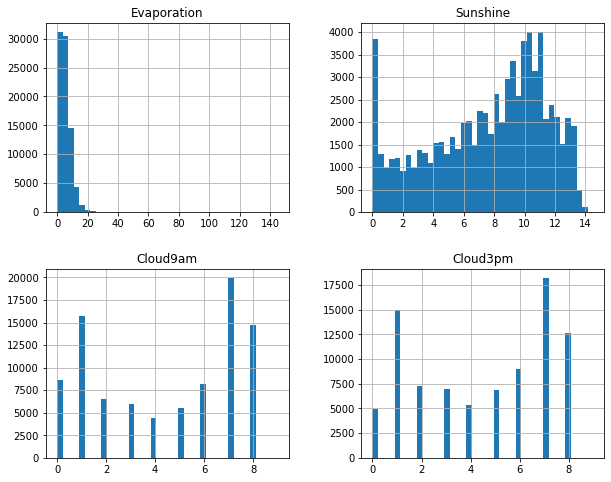

In [13]:
df[big_isna].hist(bins=40, figsize=(10, 8))
plt.show()

In [14]:
df[big_isna].groupby(df['Location']).count()

,Evaporation,Sunshine,Cloud9am,Cloud3pm
Location,,,,
Adelaide,1704,1769,0,0
Albany,2750,2520,3002,2329
Albury,0,0,1289,1427
AliceSprings,2825,2520,2706,2679
BadgerysCreek,0,0,0,0
Ballarat,0,0,2494,1992
Bendigo,1185,0,2072,2268
Brisbane,3174,3144,3192,3191
Cairns,2670,2564,2833,2810


## Checking the target column

In [15]:
target = df['RainTomorrow']

In [16]:
target.value_counts(dropna=False)

No     110316
Yes     31877
NaN      3267
Name: RainTomorrow, dtype: int64

In [17]:
target.value_counts(dropna=False,
                    normalize=True
            ).mul(100).round(2).map("{} %".format)

No     75.84 %
Yes    21.91 %
NaN     2.25 %
Name: RainTomorrow, dtype: object

In [18]:
target[target.isna()].groupby(df['Location']).size().sort_values()[::5]

Location
Darwin             1
Townsville         7
Nhil               9
Portland          13
Albany            24
NorfolkIsland     45
Wollongong        57
NorahHead         75
MountGinini      133
Melbourne        758
Name: RainTomorrow, dtype: int64

In [19]:
pd.crosstab(df['Location'], target,
                    normalize='index', margins=True
           ).mul(100).round(2).sort_values(by='Yes', ascending=False)

RainTomorrow,No,Yes
Location,,
Portland,63.45,36.55
Walpole,66.34,33.66
Cairns,68.21,31.79
Dartmoor,68.67,31.33
NorfolkIsland,68.99,31.01
MountGambier,69.64,30.36
Albany,70.09,29.91
Witchcliffe,70.22,29.78
CoffsHarbour,70.57,29.43


## Checking numerical features

In [20]:
num_columns = df.select_dtypes(include='number').columns.to_list()

In [21]:
num_features = [column for column in num_columns if column not in big_isna]

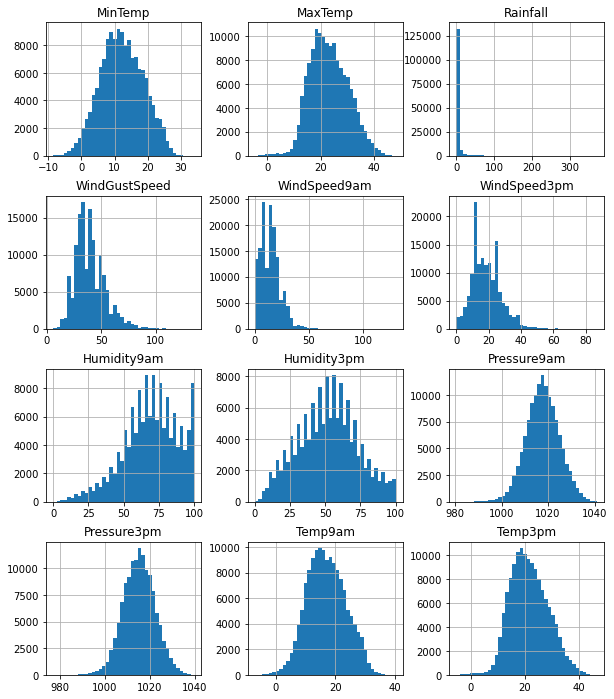

In [22]:
df[num_features].hist(bins=40, figsize=(10, 12))
plt.show()

In [23]:
num_features.remove('Rainfall')

In [24]:
print(num_features)

['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


## Checking categorial features

In [25]:
obj_columns = df.select_dtypes(include='object').columns.to_list()

In [26]:
obj_columns

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [27]:
cat_data = df[obj_columns].copy()

mapping = {'Yes': 1, 'No': 0}
cat_data['RainToday'] = cat_data['RainToday'].map(mapping)
cat_data['RainTomorrow'] = cat_data['RainTomorrow'].map(mapping)

cat_data['Date'] = pd.to_datetime(cat_data['Date']).dt.month_name()
cat_data['Date'] = ce.TargetEncoder().fit_transform(cat_data['Date'],
                                                    cat_data['RainTomorrow'])

cat_data['Location'] = ce.TargetEncoder().fit_transform(cat_data['Location'],
                                                        cat_data['RainTomorrow'])
winds = df.filter(like="Dir").columns
cat_data[winds] = ce.OrdinalEncoder().fit_transform(cat_data[winds])

cat_data

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,0.208141,0.205247,1,1,1,0.0,0.0
1,0.208141,0.205247,2,2,2,0.0,0.0
2,0.208141,0.205247,3,1,2,0.0,0.0
3,0.208141,0.205247,4,3,3,0.0,0.0
4,0.208141,0.205247,1,4,4,0.0,0.0
...,...,...,...,...,...,...,...
145455,0.261845,0.076266,16,3,8,0.0,0.0
145456,0.261845,0.076266,5,3,13,0.0,0.0
145457,0.261845,0.076266,6,3,1,0.0,0.0
145458,0.261845,0.076266,14,6,13,0.0,0.0


In [28]:
corr_matrix = cat_data.corr()

In [29]:
corr_matrix = cat_data.corr(method='spearman')

In [30]:
corr_matrix = cat_data.corr(method='kendall')

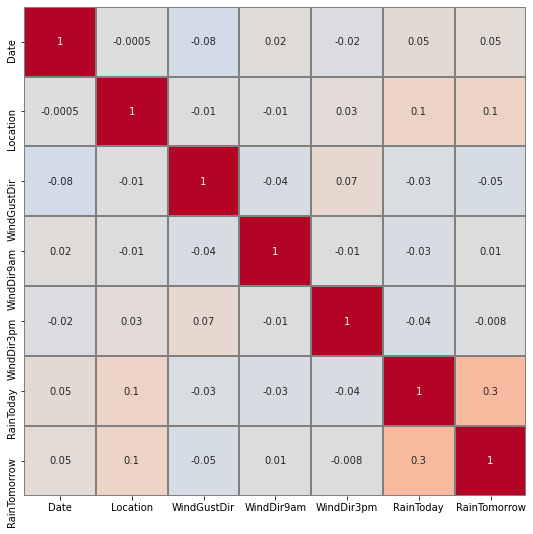

In [31]:
plt.figure(figsize=(9, 9))
sns.heatmap(corr_matrix, annot=True,
                vmin=-1, vmax=1, center=0, linewidths=1,
                cmap="coolwarm", fmt='.1g',
                linecolor='gray', cbar=False
           );

In [32]:
(df['WindGustDir'] == df['WindDir3pm']).value_counts()

False    103229
True      42231
dtype: int64

In [33]:
(df['WindGustDir'] == df['WindDir3pm'])

0         False
1         False
2          True
3         False
4         False
          ...  
145455    False
145456    False
145457    False
145458    False
145459    False
Length: 145460, dtype: bool

In [34]:
(df['WindGustDir'] == df['WindDir3pm']).map({True: 1, False: 0})

0         0
1         0
2         1
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Length: 145460, dtype: int64

In [35]:
(df['WindGustDir'] == df['WindDir3pm']).groupby(df['RainTomorrow']).count()

RainTomorrow
No     110316
Yes     31877
dtype: int64

In [36]:
mask_wind_dir = df['WindGustDir'] == df['WindDir3pm']
df['RainTomorrow'].loc[mask_wind_dir].value_counts()

No     32472
Yes     9064
Name: RainTomorrow, dtype: int64

In [37]:
df['RainTomorrow'].loc[~mask_wind_dir].value_counts()

No     77844
Yes    22813
Name: RainTomorrow, dtype: int64